### Data Exploration and Visualization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#for train test splitting
from sklearn.model_selection import train_test_split
#for decision tree object
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    classification_report, 
    confusion_matrix,
    precision_score, 
    recall_score, 
    f1_score, 
    accuracy_score,)

In [2]:
# Loading dataset
df = pd.read_csv('employee_data (1) 2.csv')
df.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
0,221,engineering,NaN,0.932868,4,NaN,low,0.829896,Left,5.0
1,232,support,NaN,NaN,3,NaN,low,0.834544,Employed,2.0
2,184,sales,NaN,0.788830,3,NaN,medium,0.834988,Employed,3.0
3,206,sales,NaN,0.575688,4,NaN,low,0.424764,Employed,2.0
4,249,sales,NaN,0.845217,3,NaN,low,0.779043,Employed,3.0


#### Data description:
- 'status': Current employment status (Employed / Left)
- 'department': Department employees belong(ed) to
- 'salary': Salary level relative to the rest of their department
- 'tenure': Number of years at the company
- 'recently_promoted': Was the employee promoted in the last 3 years?
- 'n_projects': Number of projects the employee is staffed on
- 'avg_monthly_hrs': Average number of hours worked per month
- 'satisfaction': Score for the employee's satisfaction with the company (higher is better)
- 'last_evaluation': Score for the most recent evaluation of the employee (higher is better)
- 'filed_complaint': Has the employee filed a formal complaint in the last 3 years?


### Data Exploration and Visualization

In [3]:
# Checking null values
df.isnull().sum()

avg_monthly_hrs          0
department             709
filed_complaint      12191
last_evaluation       1532
n_projects               0
recently_promoted    13949
salary                   0
satisfaction           181
status                   0
tenure                 181
dtype: int64

In [4]:
# Dropping columns with huge amount of null values
df = df.drop(columns=['filed_complaint','recently_promoted'], axis=1)
df

,avg_monthly_hrs,department,last_evaluation,n_projects,salary,satisfaction,status,tenure
0,221,engineering,0.932868,4,low,0.829896,Left,5.0
1,232,support,NaN,3,low,0.834544,Employed,2.0
2,184,sales,0.788830,3,medium,0.834988,Employed,3.0
3,206,sales,0.575688,4,low,0.424764,Employed,2.0
4,249,sales,0.845217,3,low,0.779043,Employed,3.0
...,...,...,...,...,...,...,...,...
14244,178,IT,0.735865,5,low,0.263282,Employed,5.0
14245,257,sales,0.638604,3,low,0.868209,Employed,2.0
14246,232,finance,0.847623,5,medium,0.898917,Left,5.0
14247,130,IT,0.757184,4,medium,0.641304,Employed,3.0


In [5]:
# Imputing missing values in last evaluation variable using mean (Could have used 0 as well)
from statistics import mean
Mean= df['last_evaluation'].mean()
df['last_evaluation'].fillna(value=Mean, inplace=True)

In [6]:
df.head()

,avg_monthly_hrs,department,last_evaluation,n_projects,salary,satisfaction,status,tenure
0,221,engineering,0.932868,4,low,0.829896,Left,5.0
1,232,support,0.718477,3,low,0.834544,Employed,2.0
2,184,sales,0.788830,3,medium,0.834988,Employed,3.0
3,206,sales,0.575688,4,low,0.424764,Employed,2.0
4,249,sales,0.845217,3,low,0.779043,Employed,3.0


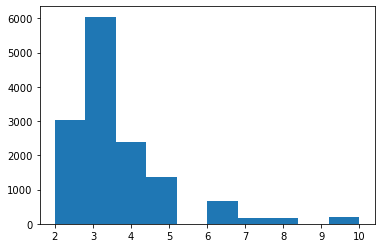

In [7]:
# creating a histogram
plt.hist(df['tenure'])
plt.show()

- Most of the employees have the tenure of 3 years
- close to 100 employees have a tenure of 10 years: an outlier

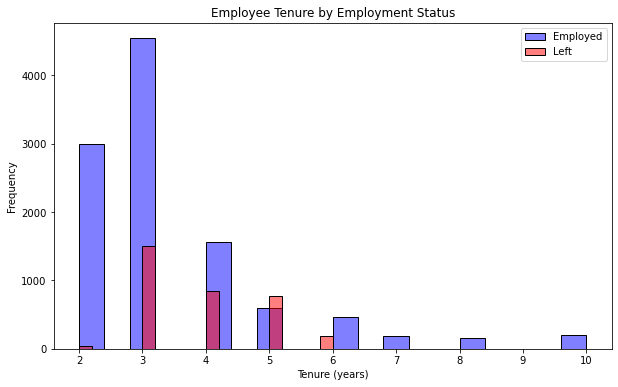

In [8]:
# Filter data for 'Employed' and 'Left' categories
employed_data = df[df['status'] == 'Employed']
left_data = df[df['status'] == 'Left']

# Set up the plot
plt.figure(figsize=(10, 6))

# Create histograms for both categories
sns.histplot(employed_data['tenure'], bins=20, kde=False, label='Employed', color='blue', alpha=0.5)
sns.histplot(left_data['tenure'], bins=20, kde=False, label='Left', color='red', alpha=0.5)

# Set labels and title
plt.xlabel('Tenure (years)')
plt.ylabel('Frequency')
plt.title('Employee Tenure by Employment Status')

# Add a legend
plt.legend()

# Show the plot
plt.show()

- The above histogram shows that most of the employees leave in the 5th year.
- The ratio of employees leaving is the least in the second year but grows substantially in year 3rd and 4th

<AxesSubplot:xlabel='status', ylabel='satisfaction'>

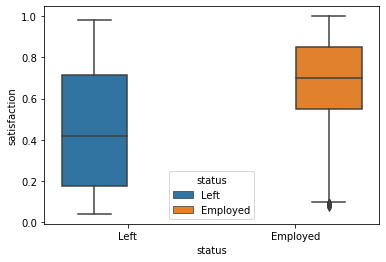

In [9]:
# Create a boxplot to examine the distribution of job satisfaction scores among employees who
# left the company and those who are still employed.
sns.boxplot(x = df['status'],
            y = df['satisfaction'],
            hue = df['status'])

- Th employees that left the company had satisfaction levels ranging from 0.2 to 0.7
- Many employees who left the company showed satisfaction level between 4.2 to 7, that also overlaps with that of the employees that continued their tenure.

<ipython-input-10-e8bbef38779e>:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


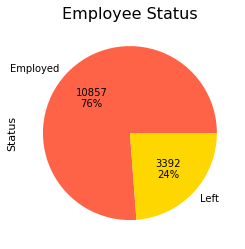

In [10]:
# Generate a pie chart to show the distribution of attrition (employees who left vs. employees
# who are still employed) in the dataset. What percentage of employees have left the company?

def label_function(val):
    return f'{val / 100 * len(df):.0f}\n{val:.0f}%'

df.groupby('status').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 10},
                                  colors=['tomato', 'gold'])
ax = plt.axes()
ax.set_ylabel('Status', size=11)
ax.set_title("Employee Status", fontsize=16)
plt.show()
# df.groupby('status').size().plot(kind='pie', autopct='%.2f')

- The above chart shows that around 24% of the employees left the company, which is 3392 employees

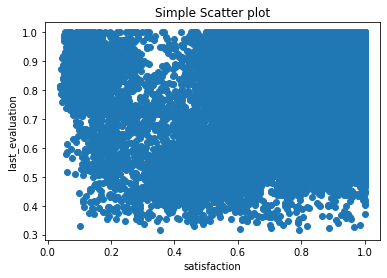

In [11]:
# scatter plot to explore the relationship between employee satisfaction scores and
# their last evaluation scores.
plt.scatter(df['satisfaction'], df['last_evaluation'])
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
plt.title('Simple Scatter plot')
plt.xlabel('satisfaction')
plt.ylabel('last_evaluation')
plt.show()

- Although there is no visible correlation that can be infered from the chart, the employees who have low evaluation scores are dissatisfied

### Building a classification model

In [12]:
# Selecting variables
X = df[['tenure', 'satisfaction', 'n_projects']]
y = df['status'] 

In [14]:
# Splitting the data - 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print("Training split input- ", X_train.shape)
print("Testing split input- ", X_test.shape)

Training split input-  (11399, 3)
Testing split input-  (2850, 3)


In [15]:
# Using two criteria in the model (Gini impurity and Entropy)
criteria = ['gini', 'entropy']

for criterion in criteria:
    # Create and train a decision tree classifier with the specified criterion
    clf = DecisionTreeClassifier(criterion=criterion, random_state=42)
    clf.fit(X_train, y_train)

    # Evaluate the classifier on the testing set
    y_pred = clf.predict(X_test)

    # Calculate accuracy to determine which criteria is more effective
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Decision Tree with Criterion "{criterion}":')
    print(f'Accuracy: {accuracy:.2f}')

Decision Tree with Criterion "gini":
Accuracy: 0.95
Decision Tree with Criterion "entropy":
Accuracy: 0.95


- The models give same accuracy for both criteria
- Since the accuracy is 95%, there is a chance that the model is overfit

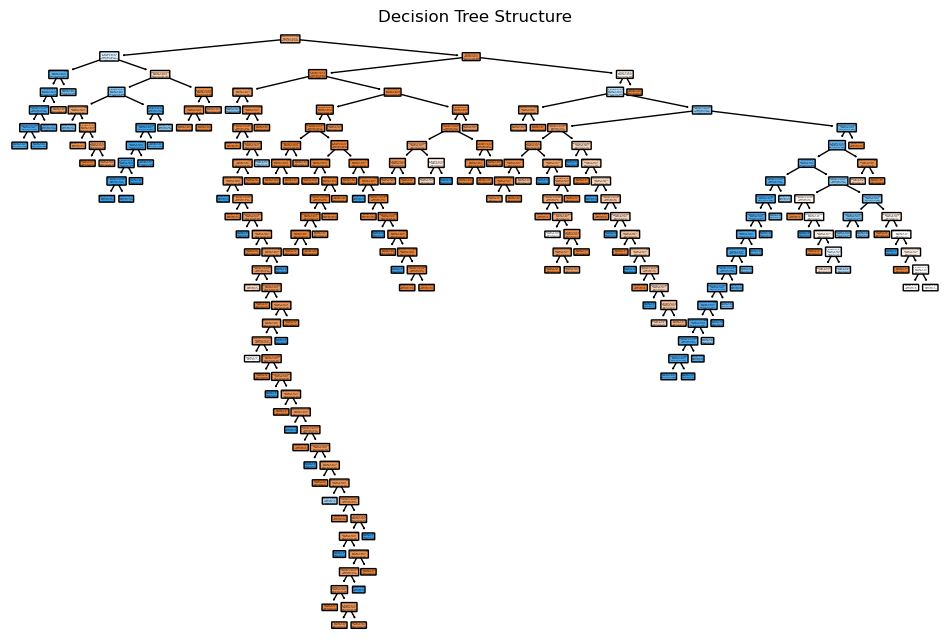

Depth of the Decision Tree: 33
Feature Importances:
tenure: 0.26
satisfaction: 0.55
n_projects: 0.19


In [16]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
selected_features = ['tenure', 'satisfaction', 'n_projects']
# Visualizing the decision tree structure
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=selected_features, class_names=['Employed', 'Left'], filled=True, rounded=True)
plt.title('Decision Tree Structure')
plt.show()

# Determining the depth of the tree
tree_depth = clf.get_depth()
print(f'Depth of the Decision Tree: {tree_depth}')

# Identifying the most influential features
feature_importances = clf.feature_importances_
print('Feature Importances:')
for feature, importance in zip(selected_features, feature_importances):
    print(f'{feature}: {importance:.2f}')

- The satisfaction score is the most influential feature for employee status, followed by Tenure which stands with an importance of 26%

In [23]:
# Post Pruning

min_samples_leaf = 10
max_depth = 10

# Creating a decision tree classifier with post-pruning
clf = DecisionTreeClassifier(criterion='gini', random_state=42, min_samples_leaf=min_samples_leaf, max_depth=max_depth)

# Training
clf.fit(X_train, y_train)

# Evaluating on training set
y_pred = clf.predict(X_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy with Pruning: {accuracy:.2f}')

# Generate a classification report
# print(classification_report(y_test, y_pred))

Accuracy with Pruning: 0.95


### Model Evaluation

In [18]:
# Initialize lists to store metric results for Gini and Entropy criteria
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
confusion_matrices = []

In [21]:
for criterion in criteria:
    # Create a decision tree classifier with post-pruning
    clf = DecisionTreeClassifier(criterion=criterion, random_state=42, min_samples_leaf=10, max_depth=5)

    # Train the classifier
    clf.fit(X_train, y_train)

    # Evaluate the classifier on the testing set
    y_pred = clf.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label='Left')
    recall = recall_score(y_test, y_pred, pos_label='Left')
    f1 = f1_score(y_test, y_pred, pos_label='Left')

    # Store metric results
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    
    # Create a confusion matrix
    confusion = confusion_matrix(y_test, y_pred, labels=['Employed', 'Left'])
    confusion_matrices.append(confusion)

In [24]:
for i, criterion in enumerate(criteria):
    print(f"Metrics for {criterion} criterion:")
    print(f"Accuracy: {accuracy_scores[i]:.2f}")
    print(f"Precision: {precision_scores[i]:.2f}")
    print(f"Recall: {recall_scores[i]:.2f}")
    print(f"F1-Score: {f1_scores[i]:.2f}")
    print("\n")

Metrics for gini criterion:
Accuracy: 0.95
Precision: 0.86
Recall: 0.91
F1-Score: 0.89


Metrics for entropy criterion:
Accuracy: 0.95
Precision: 0.86
Recall: 0.92
F1-Score: 0.89




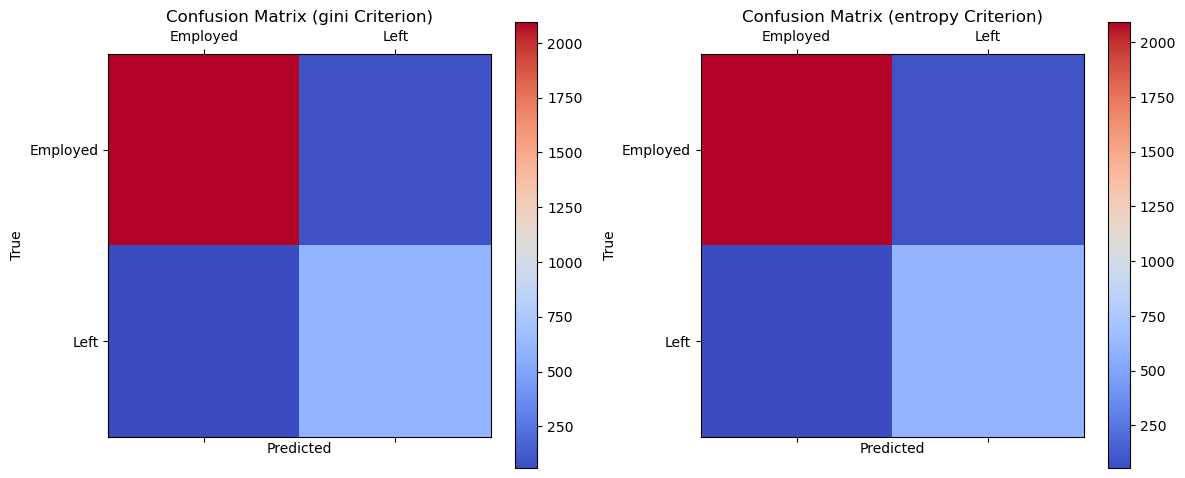

In [25]:
# Create a diverging bar chart to display confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

for i, criterion in enumerate(criteria):
    ax = axes[i]
    labels = ['Employed', 'Left']
    cmap = plt.get_cmap("coolwarm")
    im = ax.matshow(confusion_matrices[i], cmap=cmap)
    ax.set_xticks(np.arange(len(labels)))
    ax.set_yticks(np.arange(len(labels)))
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')
    ax.set_title(f'Confusion Matrix ({criterion} Criterion)')
    plt.colorbar(im, ax=ax)

plt.tight_layout()
plt.show()

### Visualization of Feature Importance


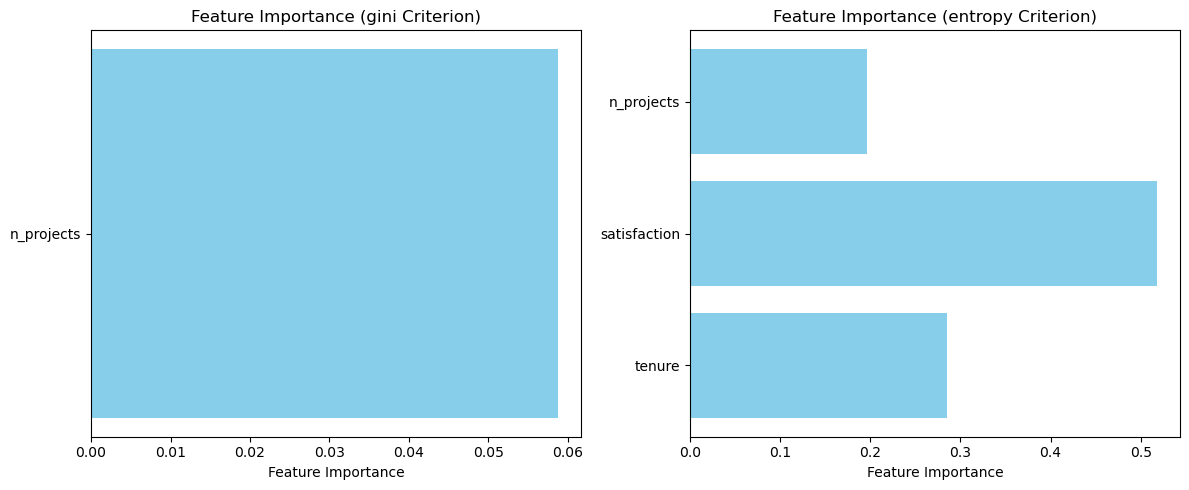

In [32]:
# Initialize lists to store feature importances for Gini and Entropy criteria

feature_importances = []

for criterion in criteria:
    # Create a decision tree classifier with post-pruning
    clf = DecisionTreeClassifier(criterion=criterion, random_state=42, min_samples_leaf=1, max_depth=5)

    # Train the classifier
    clf.fit(X_train, y_train)

    importances = clf.feature_importances_
    feature_importances.append(importances)

# Create a bar chart to visualize feature importances for Gini and Entropy criteria
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
feature_labels = selected_features

for i, criterion in enumerate(criteria):
    ax = axes[i]
    ax.barh(feature_labels, feature_importances[i], color='skyblue')
    ax.set_xlabel('Feature Importance')
    ax.set_title(f'Feature Importance ({criterion} Criterion)')

plt.tight_layout()
plt.show()
